# CH3 无监督学习与预处理

## 3.1 无监督学习的类型

**本章将研究两种类型的无监督学习：**
+ 数据集变换
+ 聚类

## 3.2 无监督学习的挑战

## 3.3 预处理与缩放

预处理和缩放通常与监督学习一起使用，但缩放方法并没有用到与“监督”有关的信息，所以是无监督的。

通常的做法是对特征进行调节，使数据表示更适合于这些算法。

### 3.3.1 不同类型的预处理

+ **`StandardScaler()`**：确保每个特征的平均值为0、方差为1，是所有特征都位于同一量级。但这种缩放不能保证特征任何特定的最大值和最小值。


+ **`RobustScaler()`**： 工作原理与StandardScaler类似，以确保每个特征的统计属性都位于同一范围。但RobustScaler使用的是中位数和四分位数，而不是平均值和方差。这样RobustScaler会忽略与其他点有很大不同的数据点（比如测量误差），这些数据点称为**异常值（outlier）**，可能会给其他缩放造成麻烦。


+ **`MinMaxScaler()`**：移动数据，使所有特征都刚好位于0到1之间。对于二维数据集来说，所有的数据都包含在x轴0到1与y轴0到1组成的矩形中。


+ **`Normalizer()`**：用到一种完全不同的缩放方法。Normalizer对每个数据点进行缩放，使得特征向量的欧式长度等于1。换句话说，它将每看一个数据点投射到半径为1的圆上（对于更高维度的情况，是球面）。这意味着每个数据点的缩放比例都不相同（乘以其长度的倒数）。如果只有数据的方向（或角度）是重要的，而特征向量的长度无关紧要，那么通常会使用这种归一化。

In [1]:
# Common imports
import pandas as pd
import numpy as np

# To plot figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = "gray"

In [2]:
# Load the dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, n_features=2, cluster_std=1, random_state=4)
X += 3

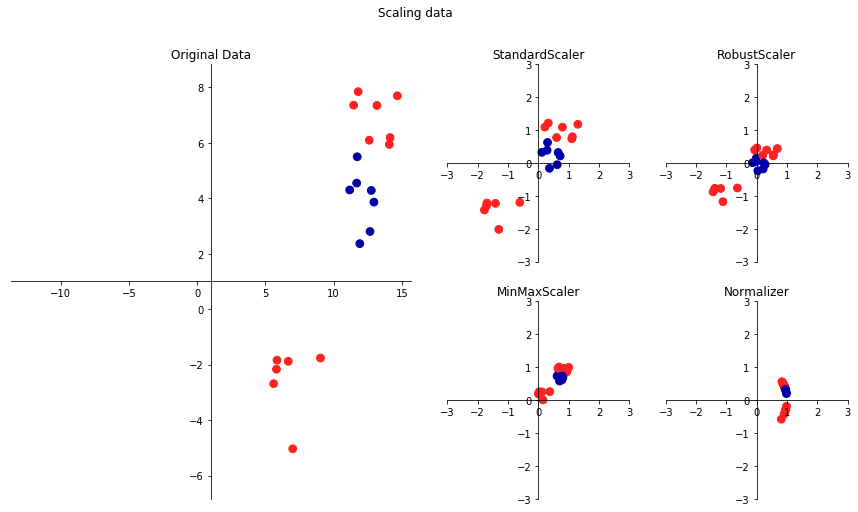

In [3]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import (StandardScaler, RobustScaler, MinMaxScaler,
                                   Normalizer)

cmap = ListedColormap(['#0000aa', '#ff2020'])

plt.figure(figsize=(15, 8))

main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)
main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s=60)
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()
main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("Original Data")

others_axes = [plt.subplot2grid((2, 4), (i, j))
               for i in range(2) for j in range(2, 4)]
for ax, scaler in zip(others_axes, [StandardScaler(), RobustScaler(),
                                    MinMaxScaler(), Normalizer()]):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap=cmap, s=60)
    ax.set_xlim(-3, 3)  # Set the data limits for the x-axis (X轴刻度范围)
    ax.set_ylim(-3, 3)  # Set the data limits for the y-axis (Y轴刻度范围)
    ax.set_title(type(scaler).__name__)

others_axes.append(main_ax)
for ax in others_axes:
    # 设置脊柱（坐标轴位置）
    # 更改参数去实验
    ax.spines["left"].set_position("center")
    ax.spines["right"].set_color("none")
    ax.spines["bottom"].set_position("center")
    ax.spines["top"].set_color("none")
    ax.xaxis.set_ticks_position("bottom")  # X轴刻度位置（下方）
    ax.yaxis.set_ticks_position("left")    # Y轴刻度位置（左侧）

plt.suptitle("Scaling data")
plt.show()

### 3.3.2 应用数据变换

将核SVM（SVC）应用在cancer数据集上，并使用MinMaxScaler来预处理数据。

+ 加载数据集，并将其分为训练集和测试集

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the data
cancer = load_breast_cancer()

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
# Split the data into training set and test set
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print("The shape of training set: ", X_train.shape)
print("The shape of test set: ", X_test.shape)

The shape of training set:  (426, 30)
The shape of test set:  (143, 30)


+ 预处理

In [8]:
from sklearn.preprocessing import MinMaxScaler

mms_scaler = MinMaxScaler()
# Fit the training data
mms_scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
# Transform training data
X_train_scaled = mms_scaler.transform(X_train)
# Print dataset properties before and after scaling
print("transformed shape:{}".format(X_train_scaled.shape))
print("\nper-feature minimum before scaling:\n{}".format(X_train.min(axis=0)))
print("\nper-feature maximum before scaling:\n{}".format(X_train.max(axis=0)))
print("\nper-feature minimum after scaling:\n{}".format(
    X_train_scaled.min(axis=0)))
print("\npr-feature maximum after scaling:\n{}".format(
    X_train_scaled.max(axis=0)))

transformed shape:(426, 30)

per-feature minimum before scaling:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]

per-feature maximum before scaling:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]

per-feature minimum after scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

pr-feature maximum after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


> 变换后的数据形状与原始数据相同，特征只是发生了移动和缩放。现在所有特征都位于0到1之间。

+ 对测试集进行变换

In [10]:
# Transform test data
X_test_scaled = mms_scaler.transform(X_test)
# Print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(
    X_test_scaled.min(axis=0)))
print("\nper-feature maximum after scaling:\n{}".format(
    X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]

per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


> 对测试集缩放后的最大值和最小值不是1和0，有些特征甚至在0-1之外。**`MinMaxScaler()`（以及其他所有缩放器）总是对训练集和测试集应用完全相同的变换。也就是说，`transform()`方法总是减去训练集的最小值，然后除以训练集的范围，而这个两个值可能与测试集的最小值和范围并不相同。**

### 3.3.3 对训练数据和测试数据进行相同的缩放

为了让模型能够在测试集上运行，对训练集和测试集应用完全相同的变换非常重要。

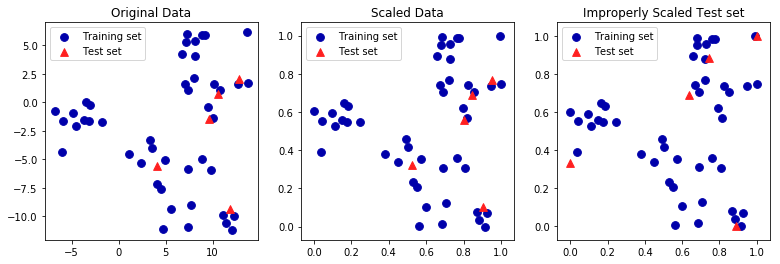

In [11]:
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

# Make synthetic (合成的，人造的) data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# Split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

cmap = ListedColormap(['#0000aa', '#ff2020'])

# Plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=cmap(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1],
                marker="^", c=cmap(1), label="Test set", s=60)
axes[0].set_title("Original Data")
axes[0].legend(loc="best")

# Scale the data using MinMaxScaler
mms_scaler = MinMaxScaler()
X_train_scaled = mms_scaler.fit_transform(X_train)
X_test_scaled = mms_scaler.transform(X_test)

# Visulize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=cmap(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
                marker="^", c=cmap(1), label="Test set", s=60)
axes[1].legend(loc="best")
axes[1].set_title("Scaled Data")

# Rescale the test set separately
# So test set min is 0 and test set max is 1
# But, DO NOT DO THIS!
test_scaler = MinMaxScaler()
X_test_scaled_badly = test_scaler.fit_transform(X_test)

# Visualize the wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=cmap(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker="^", c=cmap(1), label="Test set", s=60)
axes[2].legend(loc="best")
axes[2].set_title("Improperly Scaled Test set")

plt.show()

### 3.3.4 预处理对监督学习的作用

+ 在原始数据集上拟合SVC：

In [12]:
from sklearn.svm import SVC

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svc = SVC(C=100)  # default: kernel is "rbf"
svc.fit(X_train, y_train)
print("Test set accuary: {:.2f}".format(svc.score(X_test, y_test)))

Test set accuary: 0.63


+ 先用MinMaxScaler对数据进行缩放，再进行拟合：

In [13]:
# Preprocessin using 0-1 scaling
mms_scaler = MinMaxScaler()
X_train_scaled = mms_scaler.fit_transform(X_train)
X_test_scaled = mms_scaler.transform(X_test)

# Learning an SVC on the scaled training data
svc.fit(X_train_scaled, y_train)

# Scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svc.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


+ 使用StandardScaler进行缩放：

In [14]:
# Preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

# Learning an SVC on the scaled training data
svc.fit(X_train_scaled, y_train)

# Scoring on thge scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svc.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.96
